In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
from matplotlib import pyplot as plt

# Columns Details

In [2]:
data = pd.read_csv('LoanTap.csv')

In [3]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# Data Shape

In [4]:
data.shape

(396030, 27)

# NULL Check for data

In [5]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
data['emp_title'] = SimpleImputer(strategy='most_frequent').fit_transform(np.array(data['emp_title']).reshape(-1,1))
data['emp_length'] = SimpleImputer(strategy='most_frequent').fit_transform(np.array(data['emp_length']).reshape(-1,1))
data['title'] = SimpleImputer(strategy='most_frequent').fit_transform(np.array(data['title']).reshape(-1,1))
data['revol_util'] = SimpleImputer(strategy='mean').fit_transform(np.array(data['revol_util']).reshape(-1,1))
data['mort_acc'] = SimpleImputer(strategy='mean').fit_transform(np.array(data['mort_acc']).reshape(-1,1))
data['pub_rec_bankruptcies'] = SimpleImputer(strategy='mean').fit_transform(np.array(data['pub_rec_bankruptcies']).reshape(-1,1))

In [8]:
data['term'] = data['term'].apply(lambda x : x.split()[0])
data['term'] = np.array(data['term'],dtype='int64')

In [9]:
data['issue_d_month'] = data['issue_d'].apply(lambda x : x.split('-')[0])
data['issue_d_year'] = data['issue_d'].apply(lambda x : x.split('-')[1])
data['issue_d_year'] = np.array(data['issue_d_year'],dtype='int64')
data.drop('issue_d',axis=1,inplace=True)

In [10]:
data['earliest_cr_line_month'] = data['earliest_cr_line'].apply(lambda x : x.split('-')[0])
data['earliest_cr_line_year'] = data['earliest_cr_line'].apply(lambda x : x.split('-')[1])
data['earliest_cr_line_year'] = np.array(data['earliest_cr_line_year'],dtype='int64')
data.drop('earliest_cr_line',axis=1,inplace=True)

In [11]:
data.drop('address',axis=1,inplace=True)

In [12]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Fully Paid,vacation,Vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,Jan,2015,Jun,1990
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,Jan,2015,Jul,2004
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,Jan,2015,Aug,2007
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,Nov,2014,Sep,2006
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Charged Off,credit_card,Credit Card Refinance,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,Apr,2013,Mar,1999


In [13]:
import re
def get_number(val):
     return re.findall(r'\d+', val)[0]
data['emp_length'] = data['emp_length'].apply(get_number)
data['emp_length'] = np.array(data['emp_length'],dtype='int64')

In [14]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36,11.44,329.48,B,B4,Marketing,10,RENT,117000.0,Not Verified,Fully Paid,vacation,Vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,Jan,2015,Jun,1990
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,Jan,2015,Jul,2004
2,15600.0,36,10.49,506.97,B,B3,Statistician,1,RENT,43057.0,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,Jan,2015,Aug,2007
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6,RENT,54000.0,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,Nov,2014,Sep,2006
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,55000.0,Verified,Charged Off,credit_card,Credit Card Refinance,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,Apr,2013,Mar,1999


# Helper function for ploting graph

In [15]:
def plot_distribution(title,column,data=data,bins=100,kde=True):
    plt.title(title)
    sns.histplot(data=data,x=column,kde=kde,bins=bins)
    plt.show()
    
    
def plot_count(title,column,data=data):
    plt.title(title)
    sns.countplot(data=data,x=column)
    plt.show()

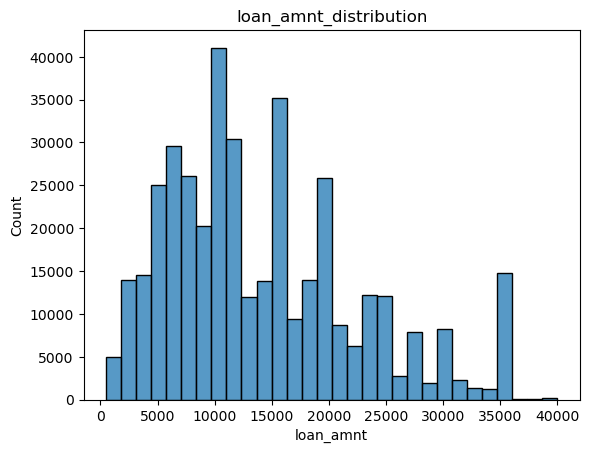

In [16]:
plot_distribution('loan_amnt_distribution','loan_amnt',bins=30,kde=False)

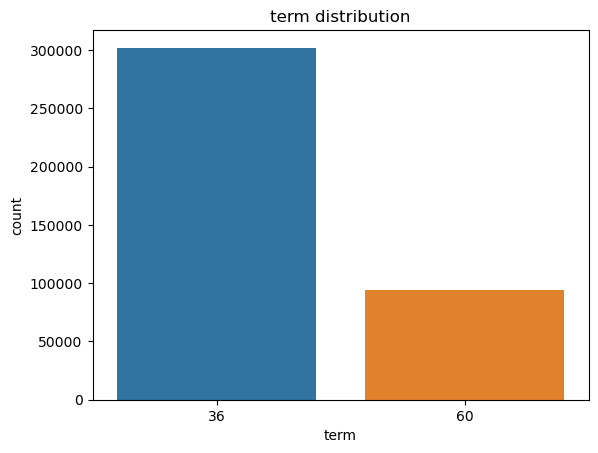

In [17]:
plot_count('term distribution',column='term')

# Observation
Users are more tending to having loan only for 36 months.

Users are less tending to having loan only for 60 months.

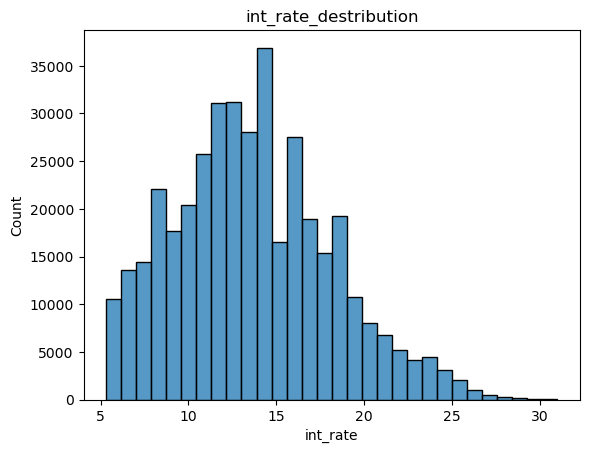

In [18]:
plot_distribution('int_rate_destribution','int_rate',bins=30,kde=False)

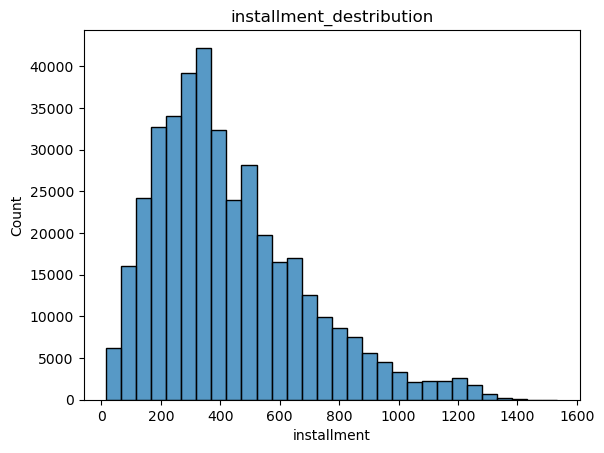

In [19]:
plot_distribution('installment_destribution','installment',bins=30,kde=False)

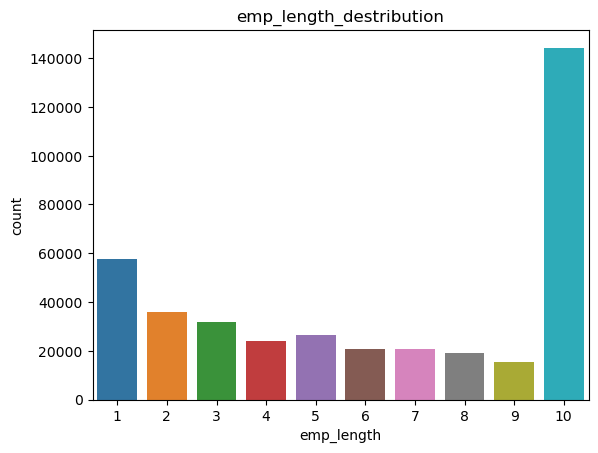

In [20]:
plot_count('emp_length_destribution',column='emp_length')

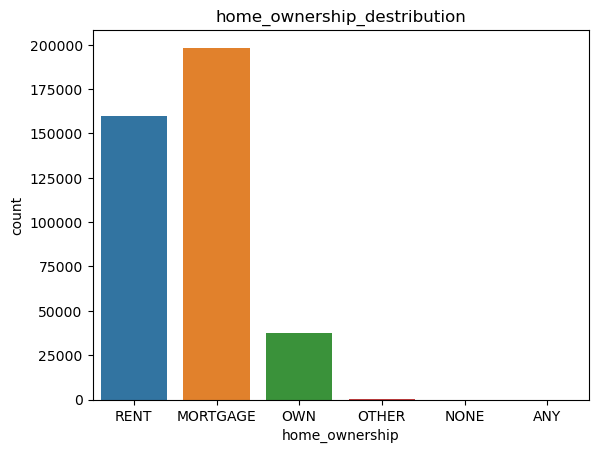

In [21]:
plot_count('home_ownership_destribution',column='home_ownership')

# From obaservation we can see that home_ownership whose type like `(other, none, any)` is less but it contributes to loan status too. So we can keep it

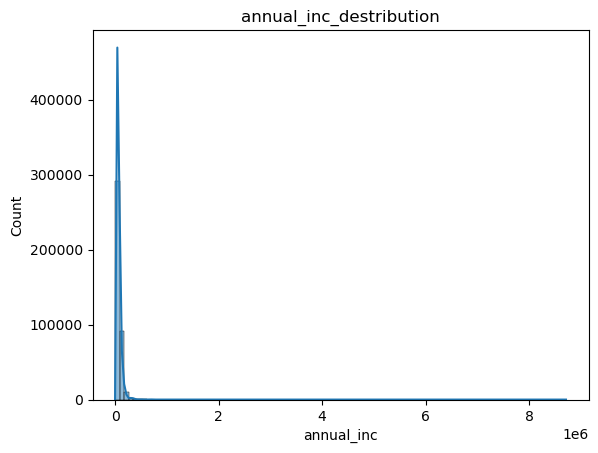

In [22]:
plot_distribution('annual_inc_destribution','annual_inc')

# Removing skewness from annual_inc Feature

In [23]:
data['annual_inc'] = np.log(data['annual_inc'])

C:\Users\gaura\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


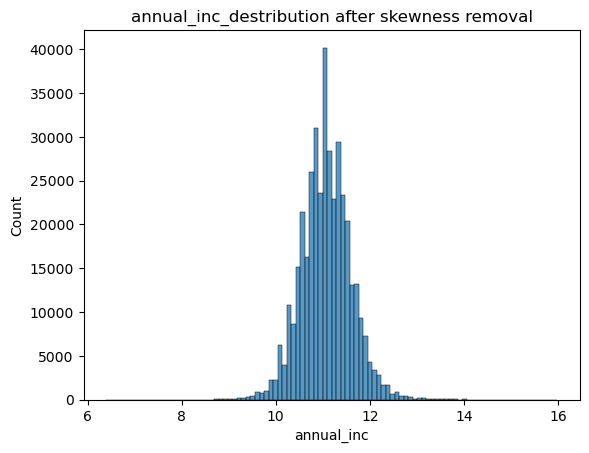

In [24]:
plot_distribution('annual_inc_destribution after skewness removal','annual_inc',kde=False)

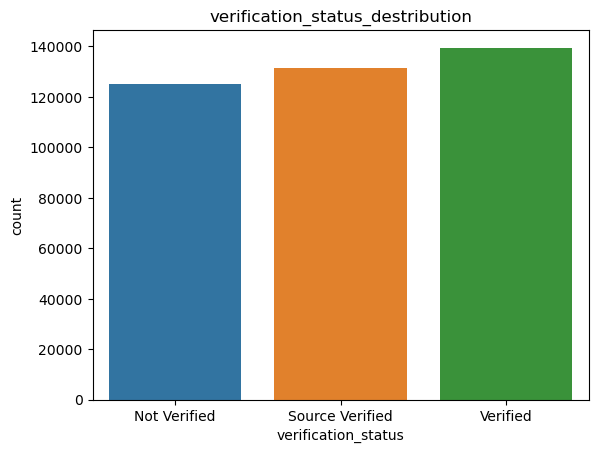

In [25]:
plot_count('verification_status_destribution',column='verification_status')

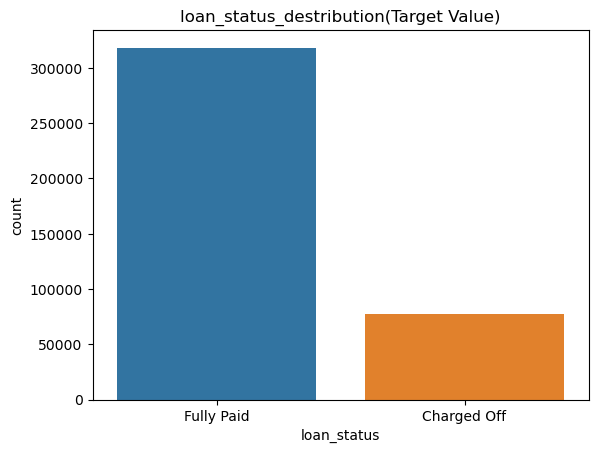

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64


In [26]:
plot_count('loan_status_destribution(Target Value)',column='loan_status')
print(data['loan_status'].value_counts())

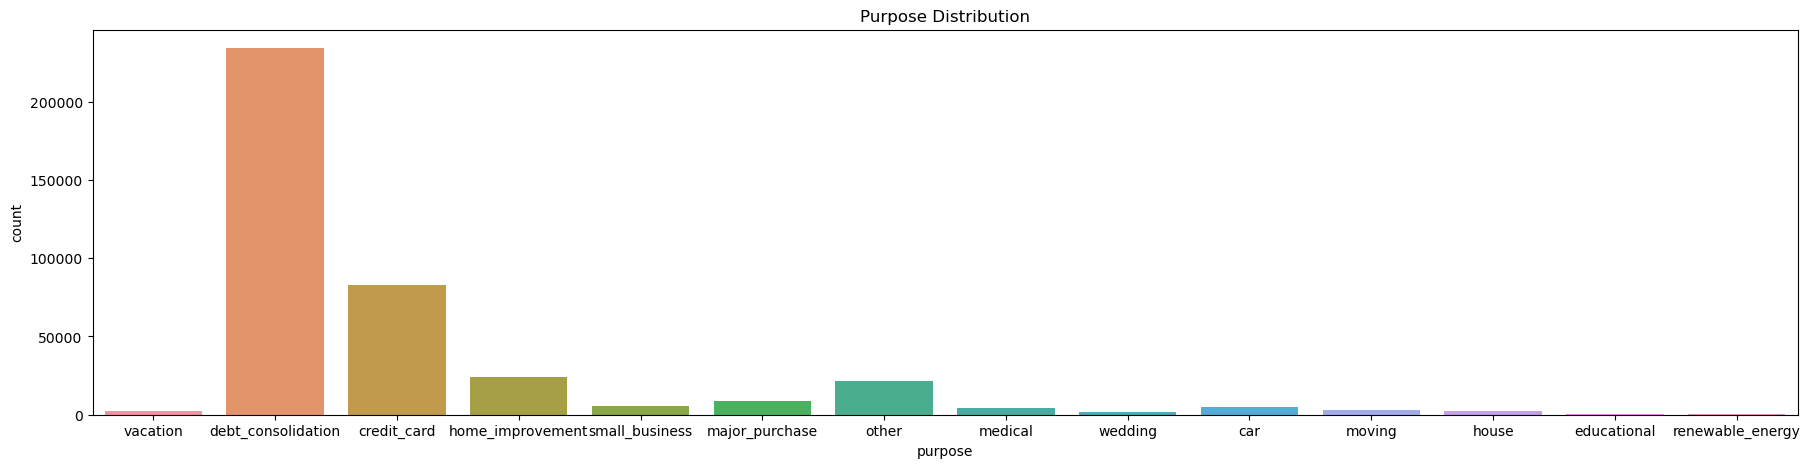

In [27]:
plt.figure(figsize=(22,5))
plt.title('Purpose Distribution')
sns.countplot(data=data,x='purpose')
plt.show()

# As per observation we can see most of the people are taking loan because of debt_consolidation

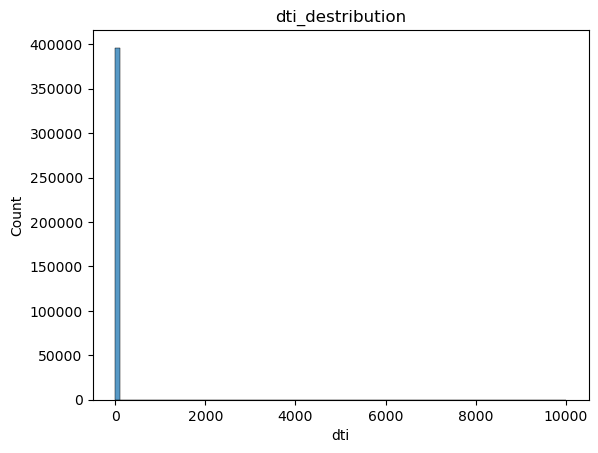

In [28]:
plot_distribution('dti_destribution','dti',kde=False)

In [29]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36,11.44,329.48,B,B4,Marketing,10,RENT,11.669929,Not Verified,Fully Paid,vacation,Vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,Jan,2015,Jun,1990
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,11.082143,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,Jan,2015,Jul,2004
2,15600.0,36,10.49,506.97,B,B3,Statistician,1,RENT,10.670280,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,Jan,2015,Aug,2007
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6,RENT,10.896739,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,Nov,2014,Sep,2006
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,10.915088,Verified,Charged Off,credit_card,Credit Card Refinance,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,Apr,2013,Mar,1999


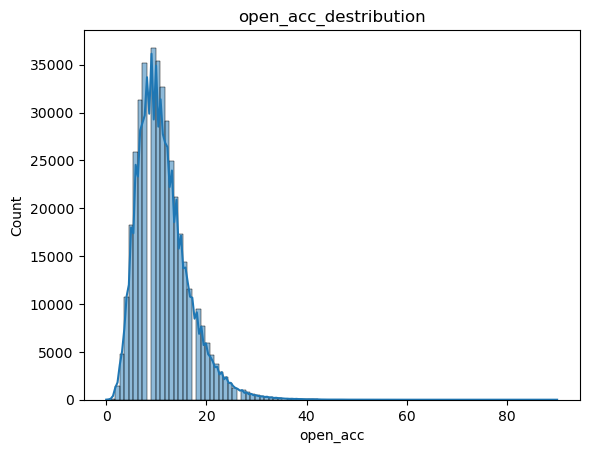

In [30]:
plot_distribution('open_acc_destribution','open_acc',kde=True)

In [31]:
# data['open_acc'] = np.sqrt(data['open_acc'])

In [32]:
# plot_distribution('open_acc_destribution after skewness removal','open_acc',kde=False)

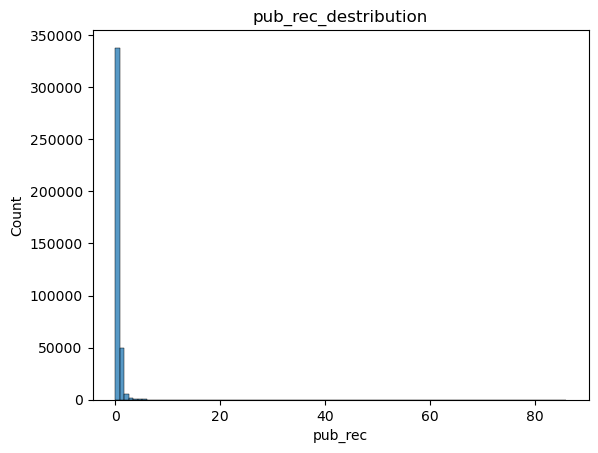

In [33]:
plot_distribution('pub_rec_destribution','pub_rec',kde=False)

In [34]:
data['revol_bal'] = np.array(data['revol_bal'],dtype='int64')

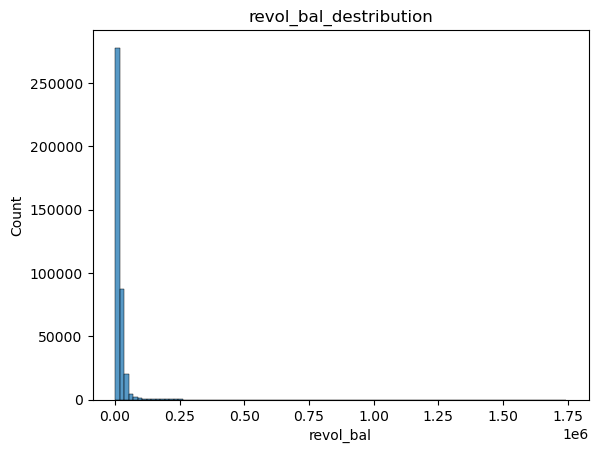

In [35]:
plot_distribution('revol_bal_destribution','revol_bal',kde=False)

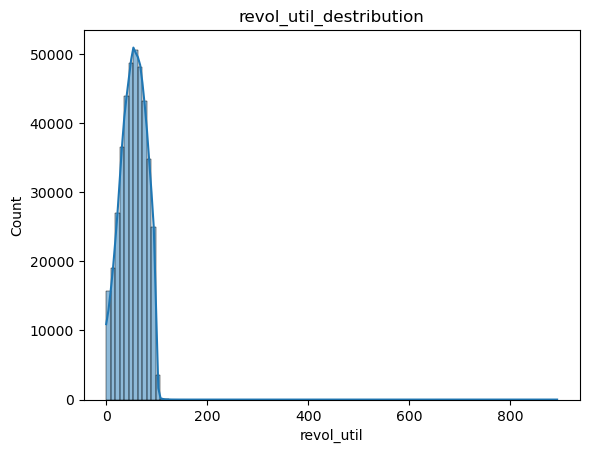

In [36]:
plot_distribution('revol_util_destribution','revol_util')

In [37]:
data['total_acc'] = np.array(data['total_acc'],dtype='int64')

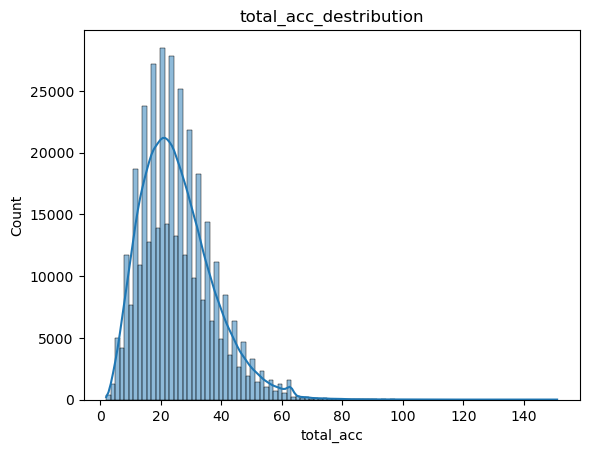

In [38]:
plot_distribution('total_acc_destribution','total_acc')

In [39]:
data['mort_acc'] = np.array(data['mort_acc'],dtype='int64')

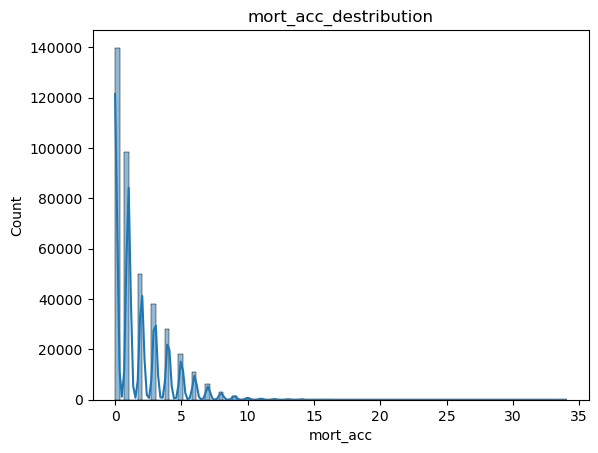

In [40]:
plot_distribution('mort_acc_destribution','mort_acc')

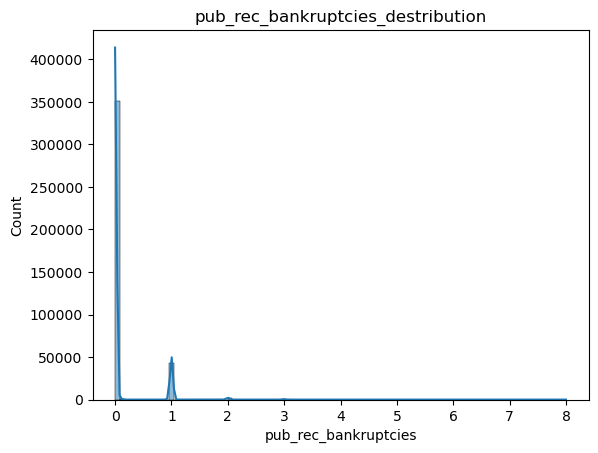

In [41]:
plot_distribution('pub_rec_bankruptcies_destribution','pub_rec_bankruptcies')

# Bivarient data analysis

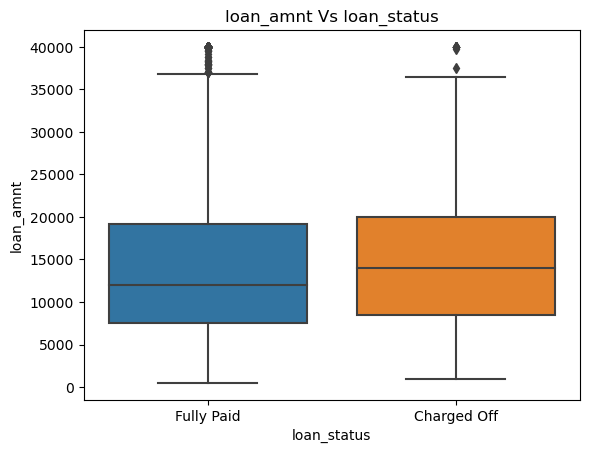

In [42]:
plt.title('loan_amnt Vs loan_status')
sns.boxplot(data=data,x='loan_status',y='loan_amnt')
plt.show()

# Outlier Detection and fixing for loan_amnt feature

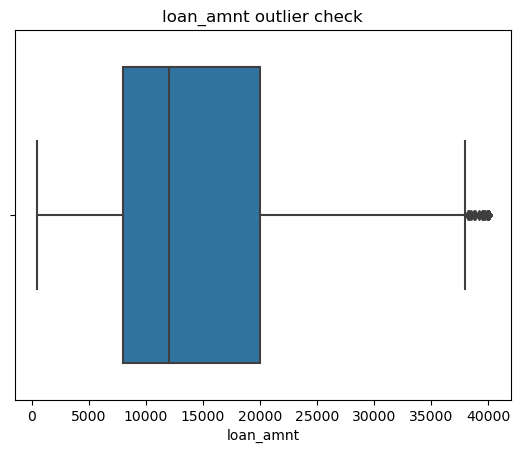

In [43]:
plt.title('loan_amnt outlier check')
sns.boxplot(data=data,x='loan_amnt')
plt.show()


In [44]:
def fixing_outlier(col,data=data):
    val = data[col]
    median = np.median(val)
    Q1,Q3 = val.quantile(0.25) , val.quantile(0.75)
    IQR = Q3-Q1
    median_to_impute = data[((data[col] >= (Q1-1.5*IQR)) | (data[col] <= (Q3+1.5*IQR)))][col].median()
    data.loc[((data[col] < (Q1-1.5*IQR)) | (data[col] >(Q3+1.5*IQR))), col] = median_to_impute
    return data
    

In [45]:
data = fixing_outlier(col='loan_amnt')

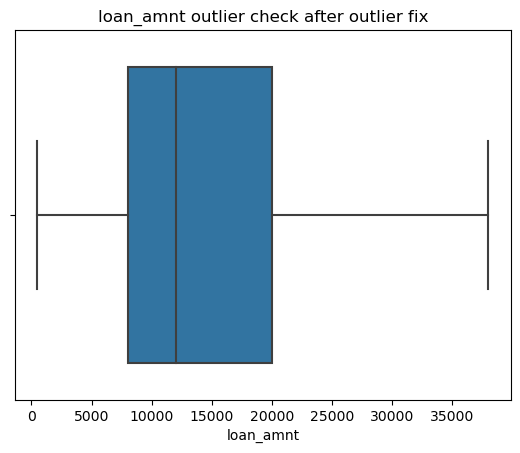

In [46]:
plt.title('loan_amnt outlier check after outlier fix')
sns.boxplot(data=data,x='loan_amnt')
plt.show()

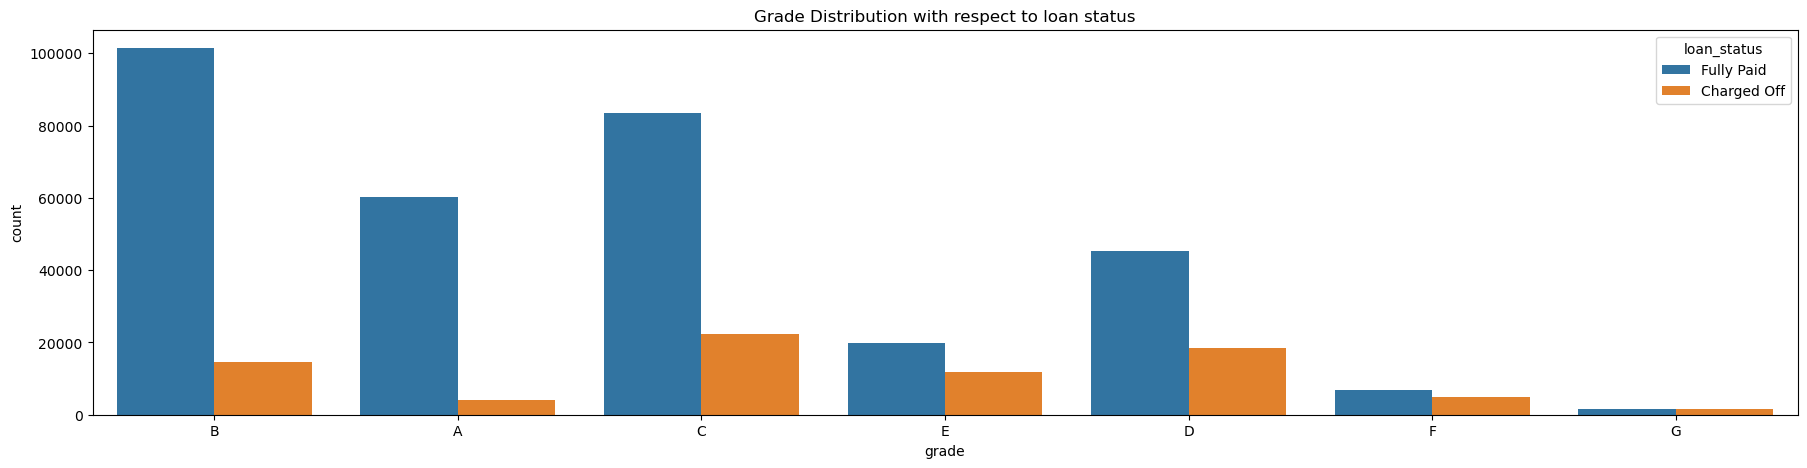

In [47]:
plt.figure(figsize=(22,5))
plt.title('Grade Distribution with respect to loan status')
sns.countplot(data=data,x='grade',hue='loan_status')
plt.show()

# Outlier Detection and fixing for loan_status feature

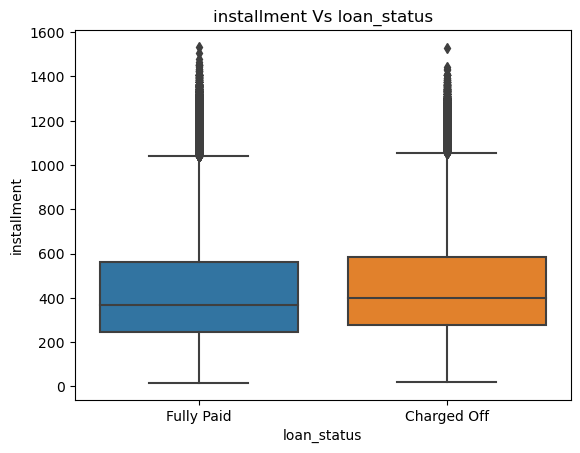

In [48]:
plt.title('installment Vs loan_status')
sns.boxplot(data=data,x='loan_status',y='installment')
plt.show()

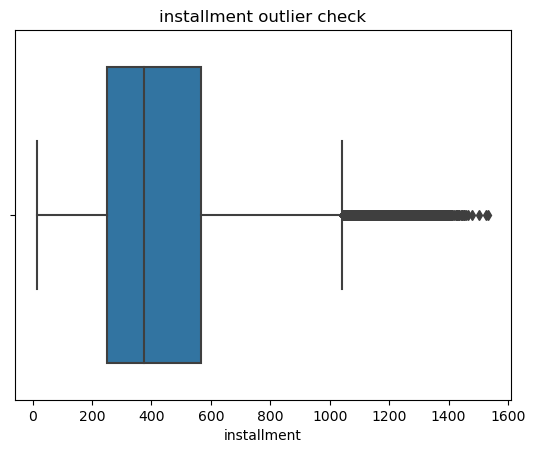

In [49]:
plt.title('installment outlier check')
sns.boxplot(data=data,x='installment')
plt.show()

In [50]:
data = fixing_outlier(col='installment')

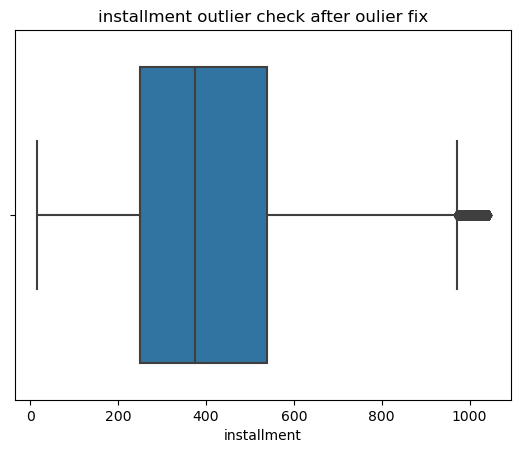

In [51]:
plt.title('installment outlier check after oulier fix')
sns.boxplot(data=data,x='installment')
plt.show()

In [52]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36,11.44,329.48,B,B4,Marketing,10,RENT,11.669929,Not Verified,Fully Paid,vacation,Vacation,26.24,16.0,0.0,36369,41.8,25,w,INDIVIDUAL,0,0.0,Jan,2015,Jun,1990
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,11.082143,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,17.0,0.0,20131,53.3,27,f,INDIVIDUAL,3,0.0,Jan,2015,Jul,2004
2,15600.0,36,10.49,506.97,B,B3,Statistician,1,RENT,10.670280,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,13.0,0.0,11987,92.2,26,f,INDIVIDUAL,0,0.0,Jan,2015,Aug,2007
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6,RENT,10.896739,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.60,6.0,0.0,5472,21.5,13,f,INDIVIDUAL,0,0.0,Nov,2014,Sep,2006
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,10.915088,Verified,Charged Off,credit_card,Credit Card Refinance,33.95,13.0,0.0,24584,69.8,43,f,INDIVIDUAL,1,0.0,Apr,2013,Mar,1999


# converting categorical to numberical

In [55]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

In [56]:
data['loan_status'] = LabelEncoder().fit_transform(data['loan_status'])

In [57]:
data['grade'] = TargetEncoder().fit_transform(data['grade'],data['loan_status'])
data['sub_grade'] = TargetEncoder().fit_transform(data['sub_grade'],data['loan_status'])
data['emp_title'] = TargetEncoder().fit_transform(data['emp_title'],data['loan_status'])
data['home_ownership'] = TargetEncoder().fit_transform(data['home_ownership'],data['loan_status'])
data['verification_status'] = TargetEncoder().fit_transform(data['verification_status'],data['loan_status'])
data['purpose'] = TargetEncoder().fit_transform(data['purpose'],data['loan_status'])
data['title'] = TargetEncoder().fit_transform(data['title'],data['loan_status'])
data['initial_list_status'] = TargetEncoder().fit_transform(data['initial_list_status'],data['loan_status'])
data['application_type'] = TargetEncoder().fit_transform(data['application_type'],data['loan_status'])
data['issue_d_month'] = TargetEncoder().fit_transform(data['issue_d_month'],data['loan_status'])
data['earliest_cr_line_month'] = TargetEncoder().fit_transform(data['earliest_cr_line_month'],data['loan_status'])

In [58]:
data = data[np.isfinite(data).all(1)]

In [59]:
data.shape

(396029, 28)

In [60]:
Y = data['loan_status']
data = data.drop('loan_status', axis=1)

# Multi-collinearity check

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
def check_vif(df):
    tmp = df.columns
    df = StandardScaler().fit_transform(df)
    df = pd.DataFrame(df,columns=tmp)
    vif_df = pd.DataFrame()
    vif_df['Features'] = df.columns
    vif_df["VIF"] = [round(variance_inflation_factor(df.values, i),2) for i in range(len(df.columns))]
    return vif_df,df

In [63]:
vif, data_tmp = check_vif(data)

# Droping features whose VIF value is greater than 5 or 10

In [64]:
vif.loc[(vif['VIF']>5) | (vif['VIF']>10) ]

,Features,VIF
0,loan_amnt,5.14
2,int_rate,18.62
4,grade,22.61
5,sub_grade,40.04


In [65]:
data.drop(['loan_amnt','int_rate','grade','sub_grade'],axis=1,inplace=True)

In [66]:
vif,data_tmp = check_vif(data)

In [67]:
vif

,Features,VIF
0,term,1.11
1,installment,1.39
2,emp_title,1.11
3,emp_length,1.11
4,home_ownership,1.33
5,annual_inc,1.77
6,verification_status,1.13
7,purpose,1.28
8,title,1.58
9,dti,1.40


In [68]:
data_tmp

,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,-0.557976,-0.368962,-0.832520,1.073194,-1.120614,1.149657,1.463972,0.292402,-0.059813,1.039226,0.912643,-0.335786,0.996727,-0.490587,-0.034892,-1.227633,0.008634,-0.844172,-0.341771,-0.280868,0.925226,0.786254,-1.091605
1,-0.557976,-0.664118,-0.285057,-0.624163,0.976430,0.028601,1.463972,-0.478499,-0.673611,0.549184,1.107285,-0.335786,0.208162,-0.020117,0.133359,0.814575,0.008634,0.614391,-0.341771,-0.280868,0.925226,-0.763064,0.853294
2,-0.557976,0.452156,0.180015,-1.472842,-1.120614,-0.756924,-0.547526,1.230130,0.244250,-0.533819,0.328718,-0.335786,-0.187334,1.571297,0.049234,0.814575,0.008634,-0.844172,-0.341771,-0.280868,0.925226,-0.474725,1.270058
3,-0.557976,-0.872440,0.572593,-0.058377,-1.120614,-0.325010,1.463972,1.230130,0.244250,-1.725590,-1.033773,-0.335786,-0.503722,-1.321068,-1.044399,0.814575,0.008634,-0.844172,-0.341771,1.018464,0.250337,0.651712,1.131137
4,1.792193,0.925702,-1.816281,0.790302,0.976430,-0.290013,-0.796617,1.230130,2.816389,1.940948,0.328718,-0.335786,0.424413,0.654904,1.479369,0.814575,0.008634,-0.357985,-0.341771,-0.985242,-0.424553,-1.678316,0.158687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,1.792193,-0.887568,0.572593,-1.189949,-1.120614,-0.897384,-0.547526,-0.478499,-0.673611,-0.201667,-1.033773,-0.335786,-0.672818,-0.797415,-0.203143,-1.227633,0.008634,-0.844172,-0.341771,-0.149612,0.925226,0.222228,0.853294
396025,-0.557976,1.347110,-0.342117,-0.341270,0.976430,1.031992,-0.547526,-0.478499,-0.673611,0.479011,-1.033773,-0.335786,1.331520,1.714483,-1.465027,0.814575,0.008634,-0.357985,-0.341771,-0.561597,0.925226,0.237237,1.131137
396026,-0.557976,-1.146917,-1.215586,1.073194,-1.120614,-0.238694,-0.796617,-0.478499,-0.106852,0.024057,0.718002,-0.335786,0.818744,0.536264,-0.203143,0.814575,0.008634,-0.844172,-0.341771,-0.149612,-0.424553,-1.678316,-0.119155
396027,1.792193,0.433883,0.572593,1.073194,0.976430,-0.000969,-0.796617,-0.478499,0.797291,-0.172428,-0.449848,-0.335786,-0.006826,0.000338,-0.455520,0.814575,0.008634,1.586766,-0.341771,0.767824,-1.099443,0.222228,-1.091605


# Training model without hyperparameter tuning

In [69]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split as tts,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [70]:
X_tr_cv, X_test, y_tr_cv, y_test = tts(data, Y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = tts(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(237617, 23)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [72]:
model = LogisticRegression()

In [73]:
model.fit(X_train,y_train)

LogisticRegression()

In [74]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val) }' ) 

Train Accuracy:0.8639449197658416, Val Accuracy:0.8617276468954372


In [75]:
y_pred = model.predict(X_val)

In [76]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Test Accuracy:{model.score(X_test,y_test)}' ) 

Train Accuracy:0.8639449197658416, Test Accuracy:0.864139080372699


In [77]:
y_pred = model.predict(X_test)

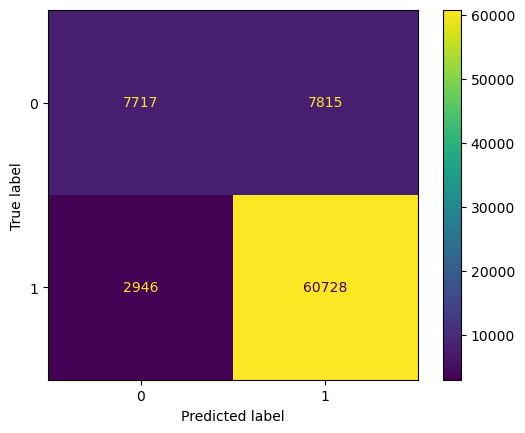

In [78]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59     15532
           1       0.89      0.95      0.92     63674

    accuracy                           0.86     79206
   macro avg       0.80      0.73      0.75     79206
weighted avg       0.85      0.86      0.85     79206



# model coefficients with column names

In [80]:
coef_df = pd.DataFrame()
coef_df['features'] = data.columns
coef_df['coeff'] = model.coef_.reshape(-1)

In [81]:
coef_df

,features,coeff
0,term,-0.396364
1,installment,-0.141372
2,emp_title,1.345183
3,emp_length,0.085035
4,home_ownership,0.145749
5,annual_inc,0.026633
6,verification_status,0.108610
7,purpose,-0.179318
8,title,0.620202
9,dti,-0.201984


In [82]:
print(f'model1 score : {roc_auc_score(y_test, model.predict_proba(X_test)[:,1])}')

model1 score : 0.8726750173112914


In [83]:
pred_prob=model.predict_proba(X_test)

In [84]:
fpr, tpr, thr = roc_curve(y_test, pred_prob[:,1])

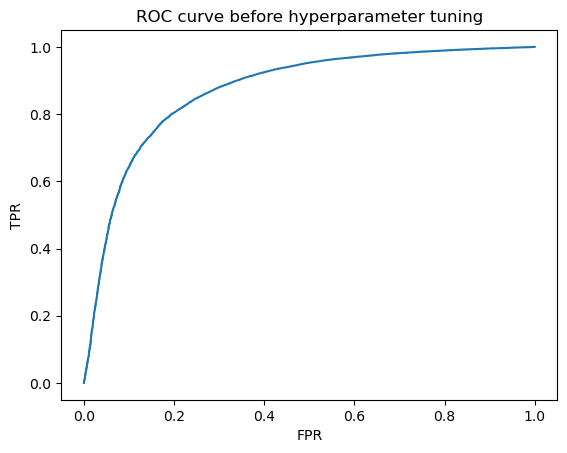

In [86]:
plt.plot(fpr,tpr,'-')
plt.title('ROC curve before hyperparameter tuning')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Precision-Recall Curve

In [87]:
precision, recall, thr = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

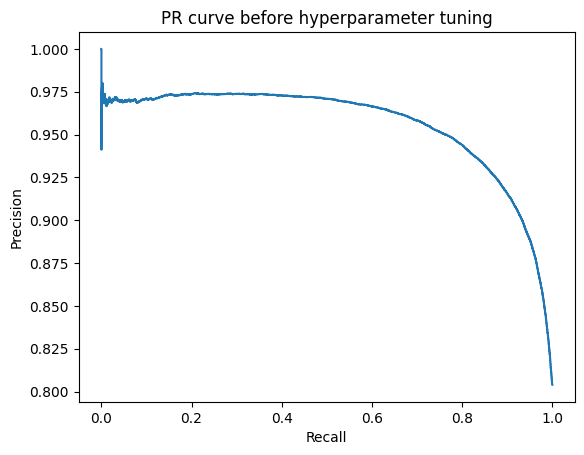

In [84]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve before hyperparameter tuning')
plt.show()

In [85]:
auc(recall, precision)

0.9556712434629503

# Tranining model with Hyperparameter Tuning

In [86]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
    scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = scaled_lr.score(X_train, y_train)
    val_score = scaled_lr.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

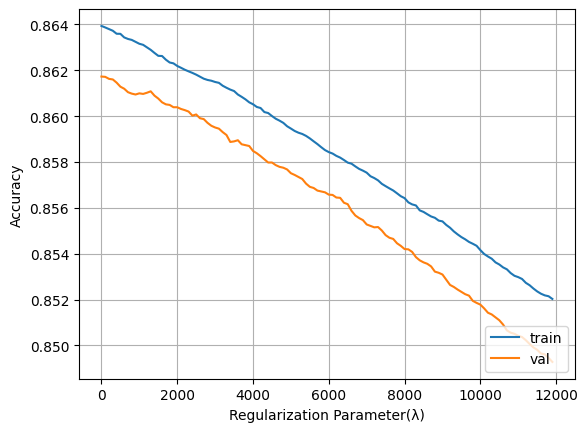

In [87]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [126]:
model_new = LogisticRegression(penalty='l1',C=1.0,solver='saga')

In [127]:
model_new.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='saga')

In [128]:
print(f'Train Accuracy:{model_new.score(X_train,y_train)}, Val Accuracy:{model_new.score(X_val,y_val) }' ) 

Train Accuracy:0.8639533366720394, Val Accuracy:0.8617528975077645


In [129]:
y_pred_new = model_new.predict(X_test)

In [130]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59     15532
           1       0.89      0.95      0.92     63674

    accuracy                           0.86     79206
   macro avg       0.80      0.73      0.75     79206
weighted avg       0.85      0.86      0.85     79206



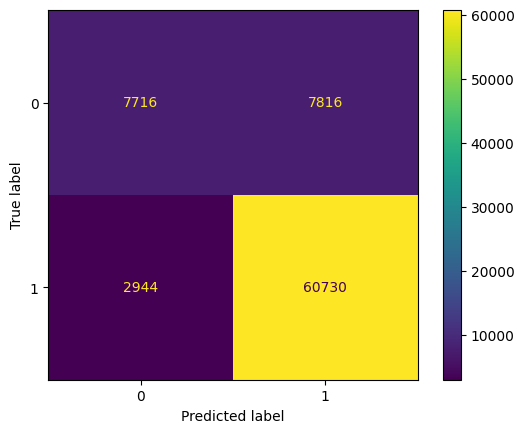

In [131]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_new)).plot()

# Model coefficients with column names after hyperparameter tuning

In [132]:
coef_df_new = pd.DataFrame()
coef_df_new['features'] = data.columns
coef_df_new['coeff'] = model_new.coef_.reshape(-1)

In [133]:
coef_df_new

,features,coeff
0,term,-0.396311
1,installment,-0.141310
2,emp_title,1.345201
3,emp_length,0.084984
4,home_ownership,0.145691
5,annual_inc,0.026674
6,verification_status,0.108565
7,purpose,-0.179227
8,title,0.620085
9,dti,-0.201944


In [134]:
pred_prob_new=model_new.predict_proba(X_test)

In [135]:
fpr_new, tpr_new, thr_new = roc_curve(y_test, pred_prob_new[:,1])

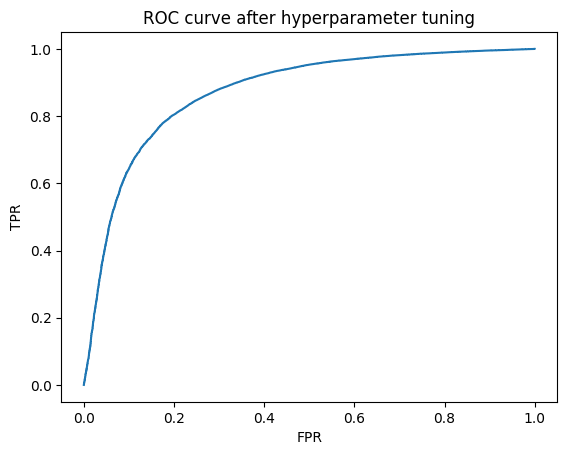

In [136]:
plt.plot(fpr_new,tpr_new,'-')
plt.title('ROC curve after hyperparameter tuning')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [137]:
print(f'model_new ROC score after hyper-parameter tuning: {roc_auc_score(y_test, pred_prob_new[:,1])}')
print(f'model ROC score before hyper-parameter tuning:    {roc_auc_score(y_test, pred_prob[:,1])}')

model_new ROC score after hyper-parameter tuning: 0.8726761528194038
model ROC score before hyper-parameter tuning:    0.8726750173112914


In [138]:
print(f'model_new AUC score after hyper-parameter tuning: {auc(fpr_new,tpr_new)}')
print(f'model AUC score before hyper-parameter tuning: {auc(fpr,tpr)}')

model_new AUC score after hyper-parameter tuning: 0.8726761528194038
model AUC score before hyper-parameter tuning: 0.8726750173112914


In [139]:
precision_n, recall_n, thr_n = precision_recall_curve(y_test, model_new.predict_proba(X_test)[:,1])

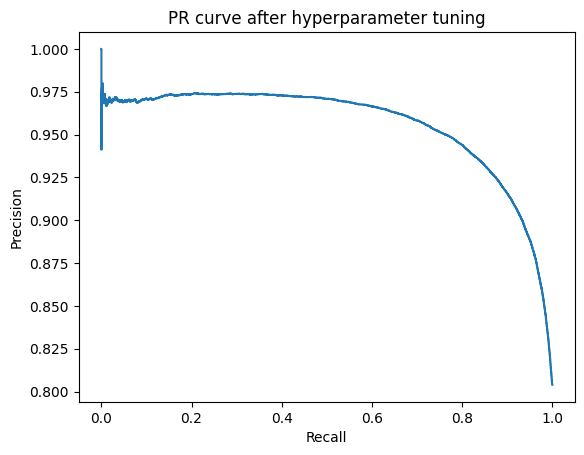

In [140]:
plt.plot(recall_n, precision_n)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve after hyperparameter tuning')
plt.show()

In [141]:
auc(recall_n, precision_n)

0.9556708648593444

In [142]:
print(f'model_new AU-PRC score after hyper-parameter tuning: {auc(recall_n, precision_n)}')
print(f'model AU-PRC score before hyper-parameter tuning:    {auc(recall, precision)}')

model_new AU-PRC score after hyper-parameter tuning: 0.9556708648593444
model AU-PRC score before hyper-parameter tuning:    0.9556712434629503


# Additional Questions

# What percentage of customers have fully paid their Loan Amount?

In [158]:
print(f'percentage of customers have fully paid their Loan Amount {round((Y.value_counts()[1]/len(Y))*100,2)}%')

percentage of customers have fully paid their Loan Amount 80.39%


# Comment about the correlation between Loan Amount and Installment features?

Have high correlation between Loan Amount and Installment so dropped it on this basis of VIF scores

# The majority of people have home ownership as ? 

majority of people have home ownership as mortgage

# People with grades ‘A’ are more likely to fully pay their loan. (T/F) ?

yes People with grades ‘A’ are more likely to fully pay their loan

Refer `Grade Distribution with respect to loan status` plot from above.

# Thinking from a bank's perspective, which metric should our primary focus be on.

Precision -> because having low false positive and high true positive should be the goal if dealing with loan issue.

# How does the gap in precision and recall affect the bank?

If Precision is high this imples that we have high true positive and low false positive.

if Recall is high this imples that we have low true positive and high false negative.

This gap can alter the decision of giving loan.

# Which were the features that heavily affected the outcome?

In [215]:
list(coef_df['features'].values)

['term',
 'installment',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'title',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'issue_d_month',
 'issue_d_year',
 'earliest_cr_line_month',
 'earliest_cr_line_year']